# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
df =pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [6]:
df.head(4).T

,0,1,2,3
Preg,6.000,1.000,8.000,1.000
Plas,148.000,85.000,183.000,89.000
Pres,72.000,66.000,64.000,66.000
skin,35.000,29.000,0.000,23.000
test,0.000,0.000,0.000,94.000
mass,33.600,26.600,23.300,28.100
pedi,0.627,0.351,0.672,0.167
age,50.000,31.000,32.000,21.000
class,1.000,0.000,1.000,0.000


In [10]:
result = df.any(axis = 1)
print(result)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
738    True
739    True
740    True
741    True
742    True
743    True
744    True
745    True
746    True
747    True
748    True
749    True
750    True
751    True
752    True
753    True
754    True
755    True
756    True
757    True
758    True
759    True
760    True
761    True
762    True
763    True
764    True
765    True
766    True
767    True
Length: 768, dtype: bool


In [11]:
df.all()

Preg     False
Plas     False
Pres     False
skin     False
test     False
mass     False
pedi      True
age       True
class    False
dtype: bool

In [13]:
median_Preg = df['Preg'].median(skipna=True)
print(median_Preg)

3.0


In [15]:
df.loc[df.Preg == 0, 'Preg'] = median_Preg

In [17]:
median_Plas = df['Plas'].median(skipna=True)
print(median_Plas)

117.0


In [20]:
df.loc[df.Plas == 0, 'Plas'] = median_Plas

In [21]:
median_Pres = df['Pres'].median(skipna=True)
print(median_Pres)

72.0


In [22]:
df.loc[df.Pres == 0, 'Pres'] = median_Pres

In [24]:
median_Skin = df['skin'].median(skipna=True)
print(median_Skin)

23.0


In [25]:
df.loc[df.skin == 0, 'skin'] = median_Skin

In [26]:
median_Test = df['test'].median(skipna=True)
print(median_Test)

30.5


In [27]:
df.loc[df.test == 0, 'test'] = median_Test

In [28]:
median_Mass = df['mass'].median(skipna=True)
print(median_Mass)

32.0


In [29]:
df.loc[df.mass == 0, 'mass'] = median_Mass

In [30]:
df.all()

Preg      True
Plas      True
Pres      True
skin      True
test      True
mass      True
pedi      True
age       True
class    False
dtype: bool

# Q5 Print the descriptive statistics of each & every column using describe() function

In [31]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [32]:
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [67]:
df.groupby(["class"]).count()


,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


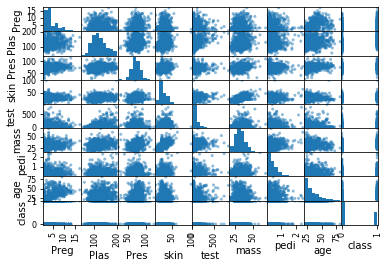

In [71]:
pima_df_attr = df.iloc[:,0:9]

axes = pd.plotting.scatter_matrix(pima_df_attr)
plt.show()


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

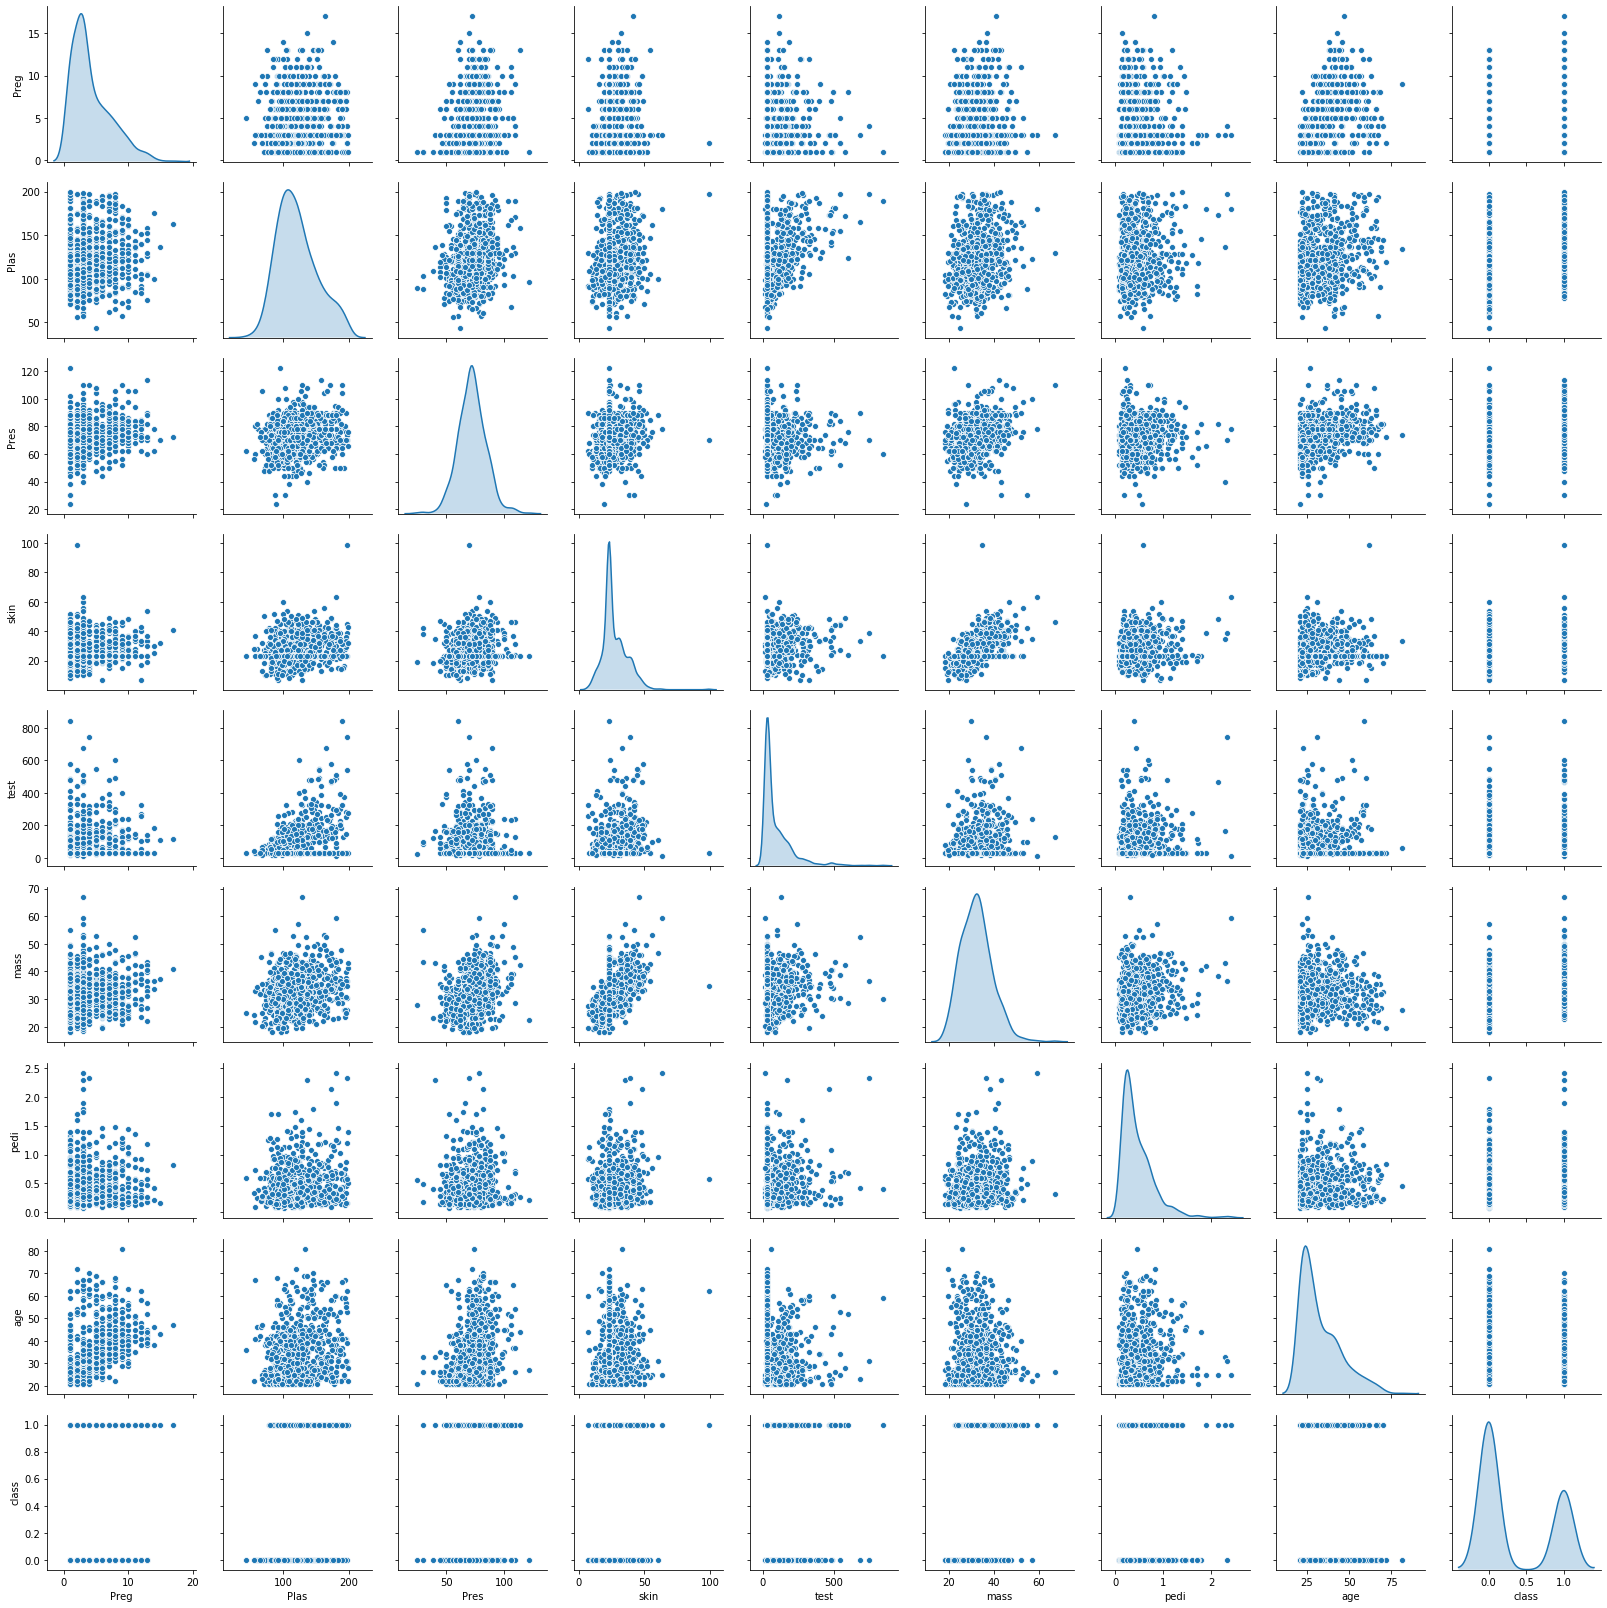

In [72]:
# Pairplot using sns
sns.pairplot(df, diag_kind='kde')

In [39]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Plas,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


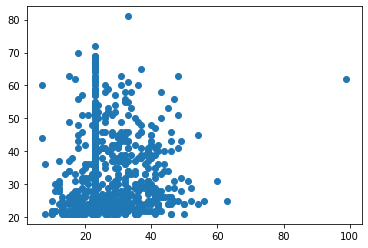

In [74]:
from matplotlib import pyplot as plt
plt.scatter(df['skin'],df['age'])
plt.show()

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [46]:
X = df.drop(['class'],axis =1)

In [47]:
Y = df["class"]

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [49]:
x_train.shape

(537, 8)

In [51]:
x_test.shape

(231, 8)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 10,min_samples_leaf=20)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [53]:
model.score(x_test , y_test)

0.7835497835497836

In [57]:

# calculate accuracy measures and confusion matrix
from sklearn import metrics
y_predict = model.predict(x_test)

In [58]:
print(metrics.confusion_matrix(y_test, y_predict))

[[117  29]
 [ 21  64]]


In [59]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Print the feature importance of the decision model - Optional

In [63]:
sfs1 = sfs(model, k_features=4,forward=True,floating=True,scoring='accuracy',cv=5)

In [64]:
sfs1 = sfs1.fit(x_train.values, y_train.values)
sfs1.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.69444444, 0.74074074, 0.71296296, 0.64485981, 0.71698113]),
  'avg_score': 0.7019978186615463,
  'feature_names': ('1',),
  'ci_bound': 0.04131986709689676,
  'std_dev': 0.03214826037307716,
  'std_err': 0.016074130186538575},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.67592593, 0.74074074, 0.74074074, 0.75700935, 0.75471698]),
  'avg_score': 0.733826746866775,
  'feature_names': ('1', '5'),
  'ci_bound': 0.038222859770228795,
  'std_dev': 0.029738683457411645,
  'std_err': 0.01486934172870582},
 3: {'feature_idx': (0, 1, 5),
  'cv_scores': array([0.67592593, 0.75925926, 0.7962963 , 0.76635514, 0.77358491]),
  'avg_score': 0.7542843054657549,
  'feature_names': ('0', '1', '5'),
  'ci_bound': 0.05283159013749723,
  'std_dev': 0.041104771989731635,
  'std_err': 0.020552385994865818},
 4: {'feature_idx': (0, 1, 3, 5),
  'cv_scores': array([0.67592593, 0.76851852, 0.7962963 , 0.76635514, 0.77358491]),
  'avg_score': 0.7561361573176

In [65]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 5]


In [66]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['Preg', 'Plas', 'skin', 'mass']
